< 8. [Visualisation de données](04-visualisation.ipynb) | [Contents](index.ipynb) | 10. [Analyse spatiale](10-analyse-spatiale.ipynb) >

In [1]:
%pylab
%matplotlib inline
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

from pandas.plotting import scatter_matrix

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = datasets.load_iris()
# jeu de donnees cars
cars = pd.read_csv('donnees/cars.txt')
# jeu de donnees auto
autos = pd.read_csv('donnees/autos.txt', delimiter='\t')
numericAutos = autos[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]

In [3]:
def plotClusters(K, labels, data, xname, yname):
    figure()
    for i in range(K):
        scatter(data.loc[labels==i, xname], data.loc[labels==i, yname], 
                label = 'groupe {}'.format(i))
    legend()
    xlabel(xname)
    ylabel(yname)

# Méthodes de segmentation
## Algorithme des k-moyennes

* page du module scikit-learn http://scikit-learn.org/stable/modules/clustering.html#k-means

In [4]:
X = numericAutos.to_numpy()
scaledX = scale(X)
K = 3
kmeans = KMeans(n_clusters=K).fit(scaledX)
for i in range(3):
    print('--------\nGroupe {}\n--------'.format(i+1))
    print(numericAutos[kmeans.labels_==i].describe())
    #print('centre du groupe {} ({} observations): {}'.format(i, sum(kmeans.labels_==i), c))

--------
Groupe 1
--------
       wheel-base      length      width     height  curb-weight  engine-size  \
count   78.000000   78.000000  78.000000  78.000000    78.000000    78.000000   
mean    94.864103  163.084615  64.150000  53.411538  2092.589744    97.294872   
std      2.546450    7.876268   0.947142   2.071951   228.245165     9.613450   
min     86.600000  141.100000  60.300000  50.600000  1488.000000    61.000000   
25%     93.700000  157.300000  63.800000  52.000000  1944.250000    92.000000   
50%     94.500000  165.300000  63.850000  53.300000  2032.500000    97.000000   
75%     95.700000  168.700000  64.400000  54.500000  2230.000000    98.000000   
max    104.900000  180.200000  66.900000  59.100000  3110.000000   134.000000   

            bore     stroke  compression-ratio  horsepower     peak-rpm  \
count  78.000000  78.000000          78.000000   78.000000    78.000000   
mean    3.104615   3.226282          10.838590   71.192308  5162.820513   
std     0.166396  

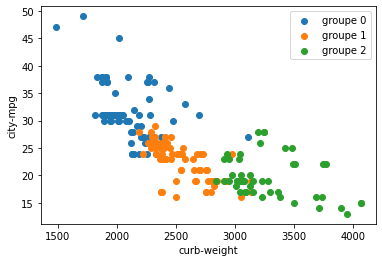

In [5]:
plotClusters(K, kmeans.labels_, autos, 'curb-weight', 'city-mpg')

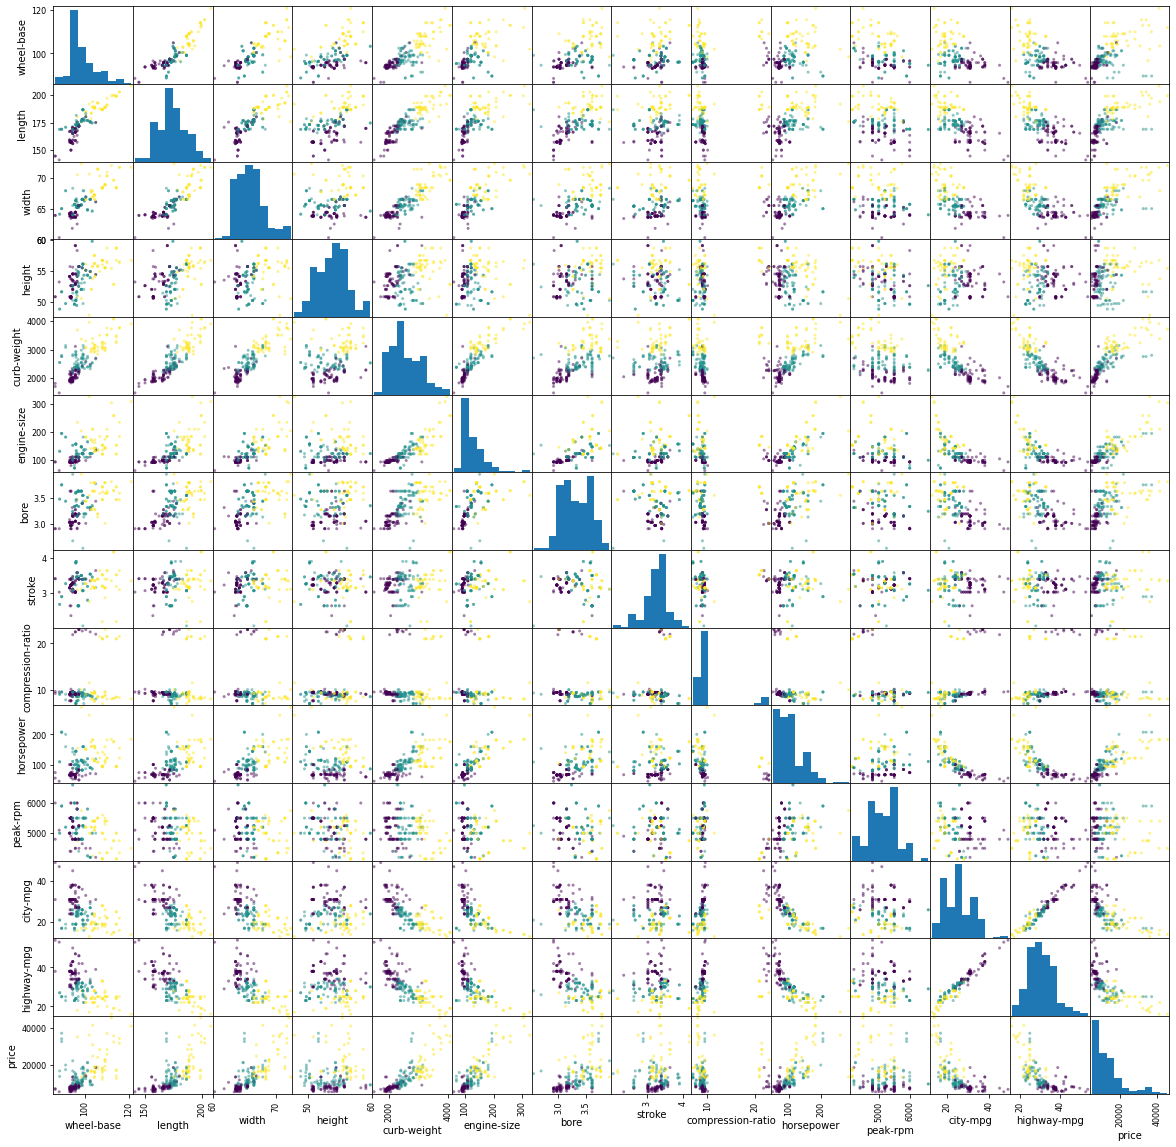

In [6]:
_=scatter_matrix(numericAutos, figsize=(20,20), c = kmeans.labels_)

## Méthodes de classification hiérarchique ascendante
* page du module scikit-learn http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering
K = 3
hac = AgglomerativeClustering(n_clusters=K, linkage = "complete").fit(scaledX)
for i in range(3):
    print('--------\nGroupe {}\n--------'.format(i+1))
    print(numericAutos[hac.labels_==i].describe())

--------
Groupe 1
--------
       wheel-base      length      width     height  curb-weight  engine-size  \
count   28.000000   28.000000  28.000000  28.000000    28.000000    28.000000   
mean   104.885714  187.525000  69.078571  54.017857  3407.321429   202.321429   
std      9.251655   12.121228   2.066910   3.205904   385.129228    49.736382   
min     89.500000  168.900000  65.000000  47.800000  2756.000000   145.000000   
25%     97.950000  177.800000  67.900000  51.400000  3182.500000   173.750000   
50%    107.900000  188.900000  68.650000  55.150000  3405.000000   188.500000   
75%    112.250000  198.900000  70.525000  56.550000  3721.250000   215.250000   
max    120.900000  208.100000  72.300000  58.700000  4066.000000   326.000000   

            bore     stroke  compression-ratio  horsepower     peak-rpm  \
count  28.000000  28.000000          28.000000   28.000000    28.000000   
mean    3.621429   3.373571          13.289286  160.107143  4882.142857   
std     0.181490  

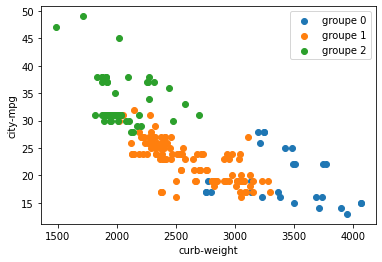

In [8]:
plotClusters(K, hac.labels_, autos, 'curb-weight', 'city-mpg')